# Extending TextWorld Environment

## Define Indoor Concepts
* Using Schematic Geometry to define relevant concept:
    - IndoorArea (Room: Container)
    - IndoorRoom (Region: Aggregate of Areas)
    - IndoorFloor (Collection: Aggregate of Rooms)
    - Door (Gateway: A link - enterable/exitable that needs action)
    - Ulink (Ulink: An unconscious link -- no need to take an action)
    - Landmark (Item: Thing)

## Define Relative (Ego-centric) Frame of Reference
* 8 possible directions -- extending 4 directions to 8
* Enable ego-centric FoR (front, back, left, right, sharp left, sharp right, slightly to left, slightly to right)
    - setting orientation to player
    - computing relative directions using the orientation and cardinal directions (N,S,W,E,NW,NE,SW,SE) between spaces
* Extend grammar:
    - Turn {sharp/slightly} left/right
    - Veer left/right

## Generate TextWorld Environment from Floorplan (GeoJSON)
* Decompose space into a set of connected areas
    - Use skeletonization to compute decision points
    - Assign area to decision points
    - Compute inside an area for landmarks and doors
    - Compute relationships (connectivity) between areas
    - Compute visibility of doors and landmarks in each area
    - Set containment relationship between areas and their rooms

In [1]:
import generator
import vertex_decompose
import logging

logging.basicConfig(level=logging.DEBUG)

# Environment

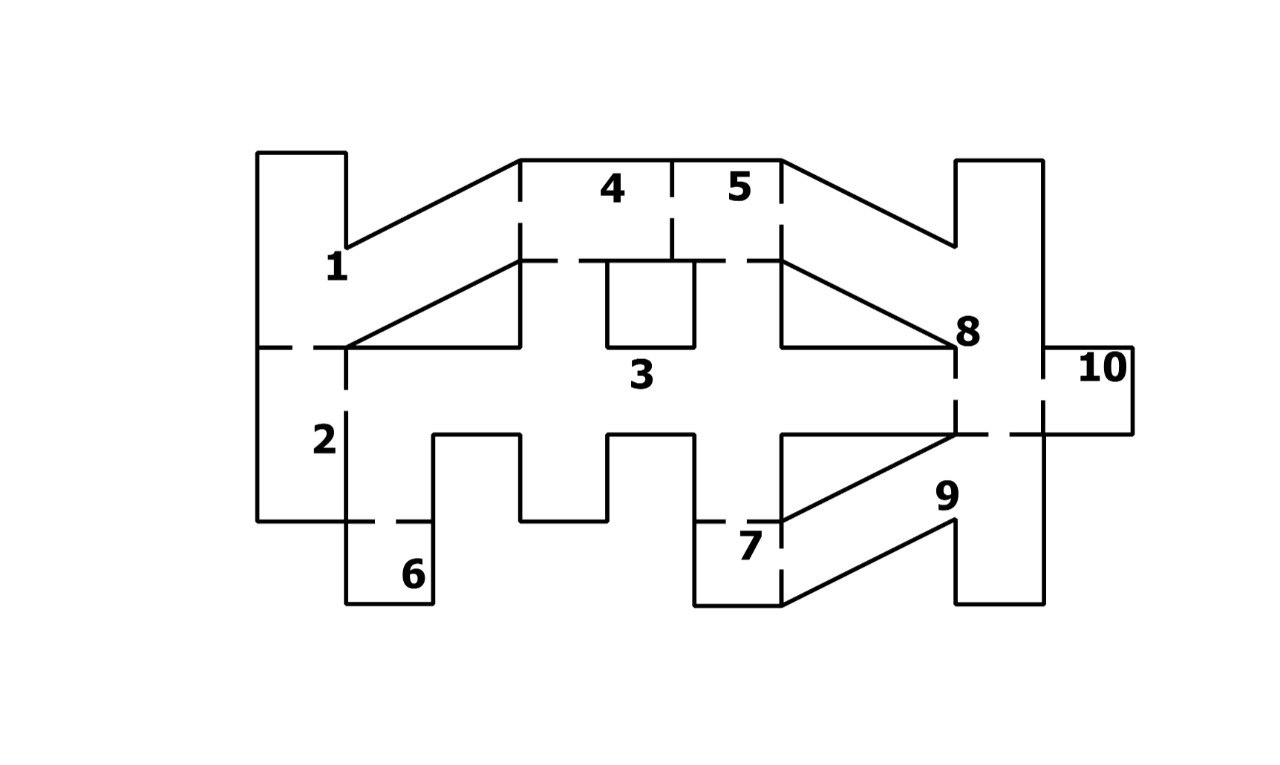

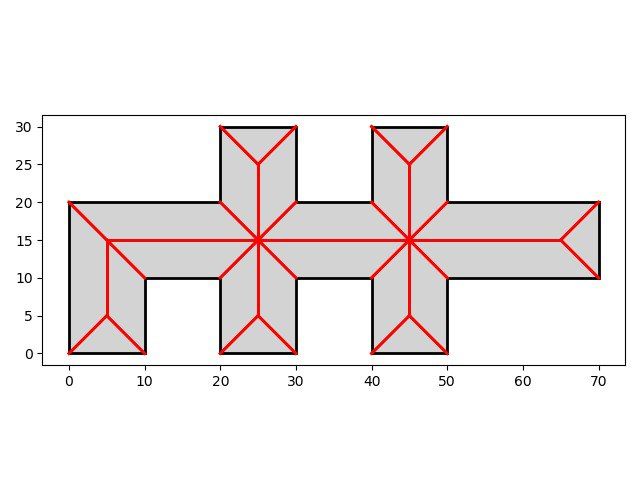

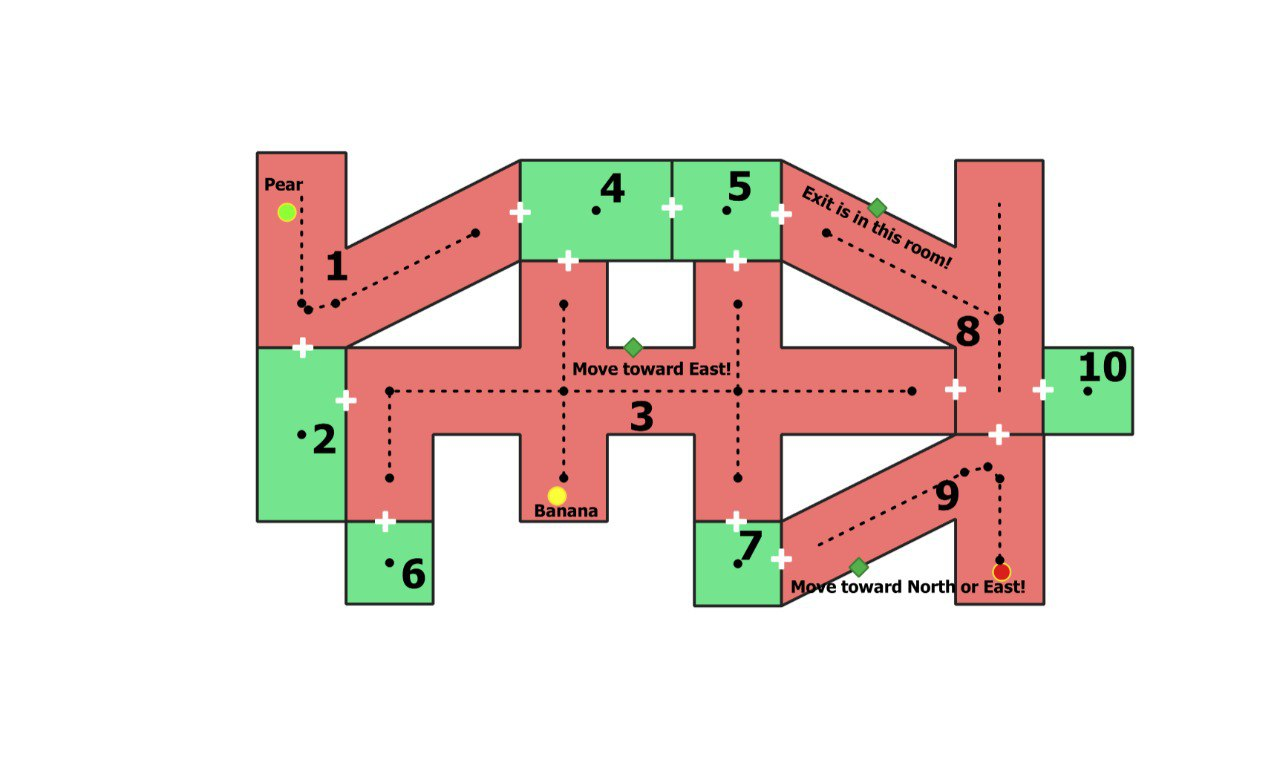

In [2]:
areas, doors, landmarks = vertex_decompose.get_info()
doors

{0: {'geometry': [0.0, 13.917393],
  'visible_areas': ['[-5.09745, 5.09745]',
   '[5, 5]',
   '[5, 15]',
   '[25, 15]',
   '[45, 15]',
   '[65, 15]'],
  'parent_room': [2, 3],
  'parent_area': ['[5, 15]', '[-5.09745, 5.09745]']},
 1: {'geometry': [-4.964496, 20.0],
  'visible_areas': ['[-5.09745, 25.0975]',
   '[-5.09745, 37.3044]',
   '[-4.33737, 24.3374]',
   '[-1.2009, 25.0871]',
   '[14.8624, 33.1752]',
   '[-5.09745, 5.09745]'],
  'parent_room': [1, 2],
  'parent_area': ['[-4.33737, 24.3374]', '[-5.09745, 5.09745]']},
 2: {'geometry': [20.0, 35.556987],
  'visible_areas': ['[-5.09745, 25.0975]',
   '[-4.33737, 24.3374]',
   '[-1.2009, 25.0871]',
   '[14.8624, 33.1752]',
   '[25.7702, 35.7702]'],
  'parent_room': [1, 4],
  'parent_area': ['[14.8624, 33.1752]', '[25.7702, 35.7702]']},
 3: {'geometry': [25.522814, 30.0],
  'visible_areas': ['[25, 15]', '[25, 5]', '[25, 25]', '[25.7702, 35.7702]'],
  'parent_room': [3, 4],
  'parent_area': ['[25, 25]', '[25.7702, 35.7702]']},
 4: {'ge

In [3]:
gen = generator.I7Generator(areas, doors, landmarks, 'a0r0', 15)
game_address = 'game/test_real.z8'
gen.generate_game(game_address)

INFO:root:[define indoor_room]
indoor_room is a kind of room.
indoor_room has a text called description.
indoor_room has a text called printed name.

[define area]
area is a kind of room.
area has a text called description.
area has a text called printed name.
area has a indoor_room called parent.
area can be enterable.
area is always enterable.

player has a number called orientation.


[define landmark]
landmark is a kind of thing.
landmark has a text called description.
landmark has a text called printed name.
landmark can be examined.
area has a list of landmark called visible_objects.

[create r0]
r0 is a indoor_room. "Room 0".

[create r1]
r1 is a indoor_room. "Room 1".

[create r2]
r2 is a indoor_room. "Room 2".

[create r3]
r3 is a indoor_room. "Room 3".

[create r4]
r4 is a indoor_room. "Room 4".

[create r5]
r5 is a indoor_room. "Room 5".

[create r6]
r6 is a indoor_room. "Room 6".

[create r7]
r7 is a indoor_room. "Room 7".

[create r8]
r8 is a indoor_room. "Room 8".

[creat

INFO:root:game is generated


In [4]:
import textworld

# Quest
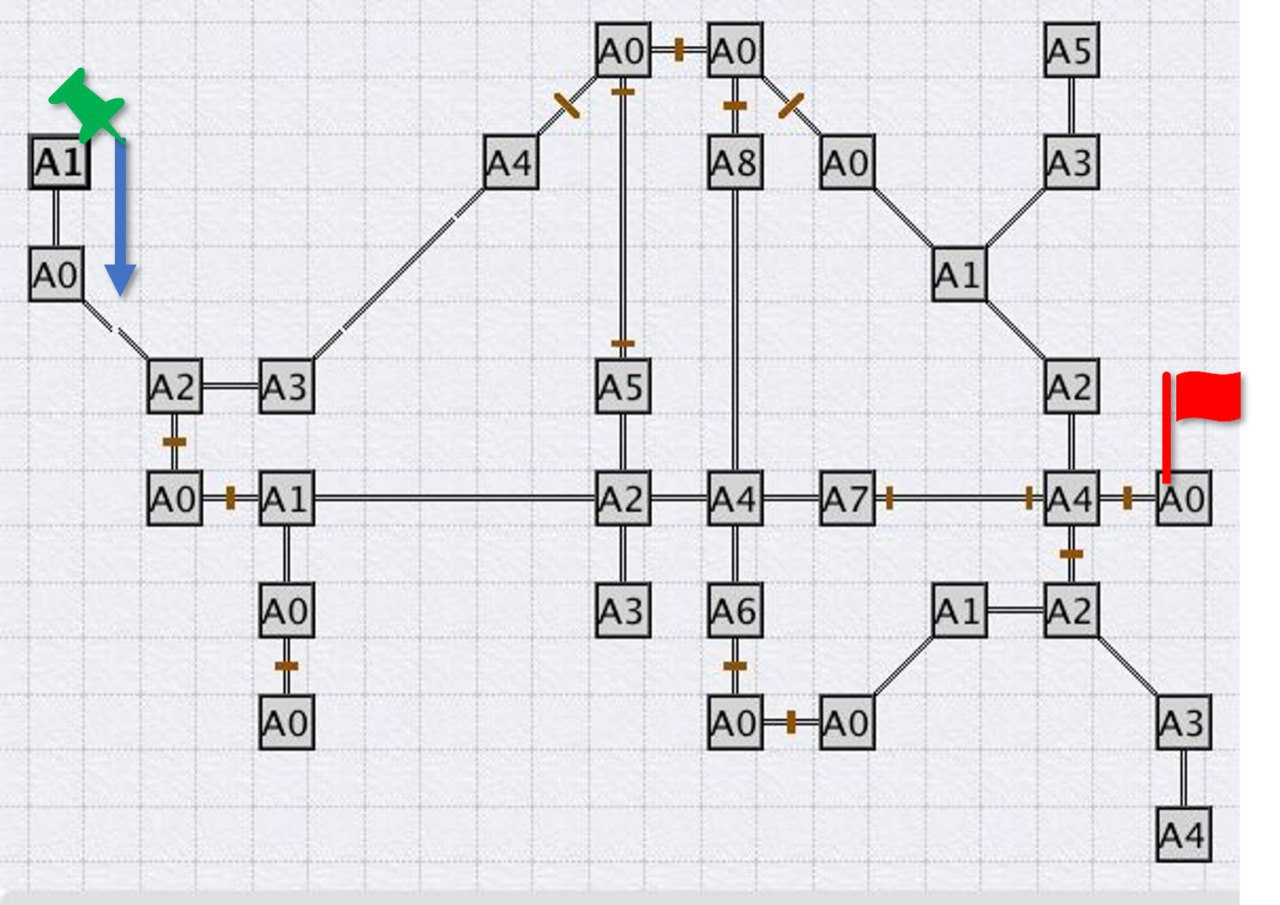

In [ ]:
textworld.play(game_address)





Welcome
An Interactive Fiction
Release 1 / Serial number 220930 / Inform 7 build 6M62 (I6/v6.34 lib 6/12N) S

Room 1
An area (1) in r1

Pear

You can continue in the r1 by going south (at the front)
Landmark 0 is visible from here, but too far! You can move in this room to
examine or access it
>
Room 1

> go front


Room 1
An area (0) in r1

You can continue in the r1 by going north (at the back)
You can continue in the r1 by going southeast (at the slight left)

1 minutes has passed, decide well in your future actions, you have limited time
14 minutes
>
Room 1

> veer left


Room 1
An area (2) in r1

Door Room 1 to Room 2

You can continue in the r1 by going northwest (at the back)
(first opening d1)
You can enter the r2 by going south (at the slight right)
You can continue in the r1 by going east (at the slight left)

2 minutes has passed, decide well in your future actions, you have limited time
13 minutes
>
Room 1

> veer right


Room 2
An area (0) in r2

Door Room 1 to Room 2
